In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
%matplotlib inline
from matplotlib.colors import Normalize
from sklearn.impute import SimpleImputer
from scipy.stats import pearsonr
from scipy.stats import norm
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import explained_variance_score
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import pearsonr
from mpl_toolkits.mplot3d import Axes3D

In [2]:
import pickle
import xgboost
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})

In [3]:
#Importing the data 
data = pd.read_csv('Raw_Housing_Prices.csv')
data.head()

,ID,Date,Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,20141013T000000,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [4]:
numerical_columns = ['No of Bathrooms', 'Flat Area (in Sqft)','Lot Area (in Sqft)','Area of the House from Basement (in Sqft)','Latitude',
                     'Longitude','Living Area after Renovation (in Sqft)']
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

In [5]:
#Zipcode conversion
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
data['Zipcode'] = imputer.fit_transform(data['Zipcode'].values.reshape(-1,1))
column = data["Zipcode"].values.reshape(-1,1)
column.shape
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
data['Zipcode'] = imputer.fit_transform(column)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date                                       21613 non-null  object 
 2   Price                                      21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21613 non-null  float64
 5   Flat Area (in Sqft)                        21613 non-null  float64
 6   Lot Area (in Sqft)                         21613 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [6]:
# Converting the data from string to categorical
data['No of Times Visited'].unique()
mapping = {'None' : "0",
           'Once' : '1',
           'Twice' : '2',
           'Thrice' : '3',
           'Four' : '4'}
data['No of Times Visited'] = data['No of Times Visited'].map(mapping)
data['No of Times Visited'].unique()
# Creating the new variable
data['Ever Renovated'] = np.where(data['Renovated Year'] == 0, 'No', 'Yes')
data.head()

,ID,Date,Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated
0,7129300520,20141013T000000,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,No
1,6414100192,20141209T000000,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes
2,5631500400,20150225T000000,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,No
3,2487200875,20141209T000000,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,No
4,1954400510,20150218T000000,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,No


In [7]:
data['Condition of the House'].unique()
data['Waterfront View'].unique()

array(['No', 'Yes'], dtype=object)

In [8]:
mapping = {'Bad' : "1",
           'Okay' : '2',
           'Fair' : '3',
           'Good' : '4',
           'Excellent' : '5'}

data['Condition of the House'] = data['Condition of the House'].map(mapping)



In [9]:
mapping = {'No' : '0',
           'Yes' : '1'}
           

data['Waterfront View'] = data['Waterfront View'].map(mapping)
data['Waterfront View'] = data['Waterfront View'].replace(np.nan, 0)

In [10]:
data['year'] = pd.DatetimeIndex(data['Date']).year
data['Years Since Renovation'] = np.where(data['Ever Renovated'] == 'Yes',
                                                     abs(data['year'] - 
                                                        data['Renovated Year']), 0)

In [11]:
data.head()

,ID,Date,Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,year,Years Since Renovation
0,7129300520,20141013T000000,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,...,63,0,98178.0,47.5112,-122.257,1340.0,5650,No,2014,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,...,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes,2014,23
2,5631500400,20150225T000000,180000.0,2,1.00,770.0,10000.0,1.0,0,0,...,85,0,98028.0,47.7379,-122.233,2720.0,8062,No,2015,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,...,53,0,98136.0,47.5208,-122.393,1360.0,5000,No,2014,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,...,31,0,98074.0,47.6168,-122.045,1800.0,7503,No,2015,0


In [12]:
data.isnull().sum()
# drop some unnecessary columns
data = data.drop('Date',axis=1)
data = data.drop('Zipcode',axis=1)
data = data.drop('Ever Renovated',axis=1)
data = data.drop('year',axis=1)
data = data.set_index('ID')
data.head()

,Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation
ID,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,3,7,1180.0,0,63,0,47.5112,-122.257,1340.0,5650,0
6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,3,7,2170.0,400,67,1991,47.7210,-122.319,1690.0,7639,23
5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,0,3,6,770.0,0,85,0,47.7379,-122.233,2720.0,8062,0
2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,5,7,1050.0,910,53,0,47.5208,-122.393,1360.0,5000,0
1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,3,8,1680.0,0,31,0,47.6168,-122.045,1800.0,7503,0


In [13]:
def clean_dataset(data):
    assert isinstance(data, pd.DataFrame), "df needs to be a pd.DataFrame"
    data.dropna(inplace=True)
    indices_to_keep = ~data.isin([np.nan, np.inf, -np.inf]).any(1)
    return data[indices_to_keep].astype(np.float64)

In [14]:
clean_dataset(data)

X = data.drop('Price',axis =1).values
y = data['Price'].values
print(X.shape, y.shape)
y = np.reshape(y, (-1,1))
y.shape

(21609, 18) (21609,)


(21609, 1)

In [15]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10)

In [17]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)

In [18]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(19448, 18) (19448, 1)
(2161, 18) (2161, 1)


In [19]:
model=LinearRegression()
model.fit(X_train,y_train)
prediction=model.predict(X_test)

In [20]:
for i in range (len(prediction)):
    print('Predicted :',prediction[i],' ','Actual :',y_test[i])
    pass

Predicted : [754893.51627309]   Actual : [760000.]
Predicted : [377364.76118156]   Actual : [280000.]
Predicted : [333849.91886723]   Actual : [192000.]
Predicted : [124941.01675728]   Actual : [230500.]
Predicted : [216979.63628055]   Actual : [550000.]
Predicted : [468991.90772157]   Actual : [308625.]
Predicted : [763661.09913578]   Actual : [459000.]
Predicted : [549440.68921932]   Actual : [1070000.]
Predicted : [369500.31506368]   Actual : [385000.]
Predicted : [-17327.82914668]   Actual : [96500.]
Predicted : [305999.44802726]   Actual : [269900.]
Predicted : [975998.24848231]   Actual : [935000.]
Predicted : [299363.23491719]   Actual : [195000.]
Predicted : [301416.47110329]   Actual : [297000.]
Predicted : [608311.05742819]   Actual : [360000.]
Predicted : [648747.46855328]   Actual : [315000.]
Predicted : [325099.95634013]   Actual : [390000.]
Predicted : [259426.24216399]   Actual : [235245.]
Predicted : [721296.12225538]   Actual : [757500.]
Predicted : [746594.85856288]  

Predicted : [569376.41786289]   Actual : [578550.]
Predicted : [390417.66500238]   Actual : [399950.]
Predicted : [665940.4189958]   Actual : [583000.]
Predicted : [457961.73805953]   Actual : [600000.]
Predicted : [597330.92866036]   Actual : [559950.]
Predicted : [370944.2321634]   Actual : [350000.]
Predicted : [548136.48347898]   Actual : [620000.]
Predicted : [1014323.02114513]   Actual : [734000.]
Predicted : [308872.18259022]   Actual : [657500.]
Predicted : [560509.40685755]   Actual : [425500.]
Predicted : [423320.55313655]   Actual : [580000.]
Predicted : [381029.19499584]   Actual : [256000.]
Predicted : [509795.63474299]   Actual : [696000.]
Predicted : [801363.50858721]   Actual : [485000.]
Predicted : [770153.7026511]   Actual : [608000.]
Predicted : [172261.44558491]   Actual : [165000.]
Predicted : [529947.65234025]   Actual : [515000.]
Predicted : [689932.94007314]   Actual : [472000.]
Predicted : [596872.01188029]   Actual : [489950.]
Predicted : [110522.36191751]   A

Predicted : [538698.57120122]   Actual : [565000.]
Predicted : [316526.44512447]   Actual : [339000.]
Predicted : [589592.24037949]   Actual : [540000.]
Predicted : [429851.80974616]   Actual : [325000.]
Predicted : [997600.35543913]   Actual : [920000.]
Predicted : [83526.65989396]   Actual : [263400.]
Predicted : [528854.25929732]   Actual : [547000.]
Predicted : [329512.34395539]   Actual : [295000.]
Predicted : [868289.0013253]   Actual : [1200000.]
Predicted : [386488.1394235]   Actual : [452000.]
Predicted : [969485.77217846]   Actual : [820000.]
Predicted : [288751.04776893]   Actual : [325000.]
Predicted : [205774.35240097]   Actual : [260000.]
Predicted : [604615.98513063]   Actual : [375000.]
Predicted : [529440.50743109]   Actual : [529999.]
Predicted : [257397.43977262]   Actual : [362500.]
Predicted : [349472.13896955]   Actual : [242000.]
Predicted : [444935.38242587]   Actual : [599950.]
Predicted : [282096.93678494]   Actual : [289900.]
Predicted : [941351.22770293]   A

Predicted : [391445.47415099]   Actual : [526000.]
Predicted : [142400.18556048]   Actual : [172500.]
Predicted : [299214.16873478]   Actual : [425000.]
Predicted : [486585.67351457]   Actual : [425000.]
Predicted : [278429.8649431]   Actual : [299800.]
Predicted : [601805.50094859]   Actual : [700000.]
Predicted : [25991.45267312]   Actual : [129000.]
Predicted : [705571.87296823]   Actual : [645500.]
Predicted : [586395.87892956]   Actual : [625000.]
Predicted : [393262.96618862]   Actual : [527500.]
Predicted : [1027386.44160733]   Actual : [1230000.]
Predicted : [443904.01445767]   Actual : [457000.]
Predicted : [380719.23641942]   Actual : [435000.]
Predicted : [325296.85189538]   Actual : [235000.]
Predicted : [697639.89827436]   Actual : [453000.]
Predicted : [453823.15829473]   Actual : [154000.]
Predicted : [265410.60801873]   Actual : [298000.]
Predicted : [949770.82602998]   Actual : [1070000.]
Predicted : [541349.28368744]   Actual : [490000.]
Predicted : [503998.50249243] 

Predicted : [600153.59642436]   Actual : [676000.]
Predicted : [522118.73591551]   Actual : [440000.]
Predicted : [727266.20642317]   Actual : [890000.]
Predicted : [78665.23143273]   Actual : [269900.]
Predicted : [395542.07222083]   Actual : [539950.]
Predicted : [463959.171914]   Actual : [458500.]
Predicted : [625618.46811685]   Actual : [658100.]
Predicted : [733488.39549423]   Actual : [653000.]
Predicted : [508125.60901688]   Actual : [570000.]
Predicted : [858586.40092838]   Actual : [799000.]
Predicted : [752379.75421696]   Actual : [739000.]
Predicted : [446284.35866801]   Actual : [560000.]
Predicted : [385120.21522309]   Actual : [376000.]
Predicted : [402428.59370283]   Actual : [550000.]
Predicted : [248486.84535802]   Actual : [282000.]
Predicted : [547984.5244491]   Actual : [550000.]
Predicted : [626625.7531613]   Actual : [723000.]
Predicted : [509706.11284482]   Actual : [450000.]
Predicted : [388682.66681548]   Actual : [324000.]
Predicted : [1051180.56803949]   Act

Predicted : [473308.29312121]   Actual : [774900.]
Predicted : [382743.36729706]   Actual : [341000.]
Predicted : [1404521.89895567]   Actual : [1680000.]
Predicted : [457498.93800647]   Actual : [455000.]
Predicted : [935403.45257116]   Actual : [814842.]
Predicted : [470658.38858362]   Actual : [382500.]
Predicted : [220684.32703455]   Actual : [245000.]
Predicted : [333438.06015371]   Actual : [289999.]
Predicted : [308356.21244165]   Actual : [254000.]
Predicted : [906697.039135]   Actual : [1230000.]
Predicted : [489444.50498293]   Actual : [370000.]
Predicted : [218660.62468024]   Actual : [250000.]
Predicted : [405036.84790561]   Actual : [309500.]
Predicted : [871240.40009489]   Actual : [510000.]
Predicted : [937872.29967485]   Actual : [900000.]
Predicted : [940731.65130643]   Actual : [919204.]
Predicted : [244135.40997737]   Actual : [269000.]
Predicted : [654818.44376879]   Actual : [1000000.]
Predicted : [661888.86541122]   Actual : [640000.]
Predicted : [617453.14997771]

Predicted : [431551.54556716]   Actual : [420000.]
Predicted : [287553.95281818]   Actual : [297950.]
Predicted : [518464.93359774]   Actual : [372000.]
Predicted : [43085.34486987]   Actual : [225205.]
Predicted : [724362.54684091]   Actual : [766000.]
Predicted : [326153.38431765]   Actual : [415000.]
Predicted : [403357.46109214]   Actual : [260000.]
Predicted : [832632.91606772]   Actual : [979000.]
Predicted : [912580.97428913]   Actual : [578000.]
Predicted : [666509.7156487]   Actual : [616950.]
Predicted : [671462.19217862]   Actual : [760000.]
Predicted : [979226.43633211]   Actual : [746500.]
Predicted : [139146.55948319]   Actual : [285000.]
Predicted : [763393.09786785]   Actual : [840000.]
Predicted : [862428.53570257]   Actual : [550000.]
Predicted : [81601.21935063]   Actual : [174950.]
Predicted : [1173306.35455885]   Actual : [1580000.]
Predicted : [149426.70337046]   Actual : [225000.]
Predicted : [98691.10590036]   Actual : [400000.]
Predicted : [690422.23720866]   A

Predicted : [715533.12580582]   Actual : [600000.]
Predicted : [1146052.83674095]   Actual : [1150000.]
Predicted : [533779.32141928]   Actual : [819000.]
Predicted : [333045.18660437]   Actual : [267500.]
Predicted : [538740.64432027]   Actual : [555000.]
Predicted : [522172.74620574]   Actual : [469000.]
Predicted : [173837.27508105]   Actual : [215000.]
Predicted : [666026.05155301]   Actual : [577500.]
Predicted : [557840.05220468]   Actual : [556000.]
Predicted : [338312.65282621]   Actual : [390000.]
Predicted : [127139.19201896]   Actual : [153000.]
Predicted : [1011950.35298302]   Actual : [1310000.]
Predicted : [149119.48400421]   Actual : [240000.]
Predicted : [363343.52420977]   Actual : [295000.]
Predicted : [589435.11037416]   Actual : [442515.]
Predicted : [575423.60834125]   Actual : [550000.]
Predicted : [723982.38613278]   Actual : [695000.]
Predicted : [1223925.99366737]   Actual : [1250000.]
Predicted : [452244.72245437]   Actual : [368000.]
Predicted : [483450.95218

Predicted : [344069.30476586]   Actual : [255000.]
Predicted : [361512.86910683]   Actual : [270000.]
Predicted : [899429.55556871]   Actual : [792000.]
Predicted : [1392260.04625826]   Actual : [2540000.]
Predicted : [674668.14390563]   Actual : [433495.]
Predicted : [337523.73863005]   Actual : [294950.]
Predicted : [234506.72055405]   Actual : [465000.]
Predicted : [682298.95818706]   Actual : [610000.]
Predicted : [612672.63663227]   Actual : [740000.]
Predicted : [469583.10454428]   Actual : [559950.]
Predicted : [455525.37914838]   Actual : [450000.]
Predicted : [775959.78556903]   Actual : [551000.]
Predicted : [713802.65796621]   Actual : [620000.]
Predicted : [670172.48241304]   Actual : [378000.]
Predicted : [626342.12113286]   Actual : [690000.]
Predicted : [419700.00988289]   Actual : [316000.]
Predicted : [493977.68929106]   Actual : [315000.]
Predicted : [290599.74515587]   Actual : [454280.]
Predicted : [416995.2809731]   Actual : [352500.]
Predicted : [416081.14096836] 

Predicted : [812459.22774561]   Actual : [632500.]
Predicted : [580534.03701422]   Actual : [625000.]
Predicted : [1733988.49120802]   Actual : [2630000.]
Predicted : [453871.37416367]   Actual : [755000.]
Predicted : [133004.32039865]   Actual : [218500.]
Predicted : [787554.76731849]   Actual : [587000.]
Predicted : [761991.30495231]   Actual : [770000.]
Predicted : [510819.24152557]   Actual : [622000.]
Predicted : [1016806.11738187]   Actual : [914600.]
Predicted : [371759.49780867]   Actual : [205000.]
Predicted : [1040609.03941893]   Actual : [1100000.]
Predicted : [84659.05898489]   Actual : [232500.]
Predicted : [381325.16298909]   Actual : [365000.]
Predicted : [1195657.20284073]   Actual : [1700000.]
Predicted : [700791.18928352]   Actual : [704000.]
Predicted : [773351.11770513]   Actual : [485000.]
Predicted : [489779.12192015]   Actual : [339950.]
Predicted : [277304.14675321]   Actual : [335000.]
Predicted : [991066.16558957]   Actual : [820000.]
Predicted : [150914.36989

In [21]:
acc = model.score(X_test, y_test) # acc stands for accuracy 
acc

0.6617313864859775

In [22]:
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,prediction)),'.3f'))
rtrsm = float(format(model.score(X_train, y_train),'.3f'))
artrsm = float(format(adjustedR2(model.score(X_train,y_train),X_train.shape[0],18),'.3f'))
rtesm = float(format(model.score(X_test, y_test),'.3f'))
artesm = float(format(adjustedR2(model.score(X_test,y_test),X_test.shape[0],18),'.3f'))
cv = float(format(cross_val_score(model,X,y,cv=5).mean(),'.3f'))

In [23]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Linear Regression(feauture scaling)','All features',rmsesm,rtrsm,artrsm,rtesm,artesm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Multiple Linear Regression(feauture scaling),All features,207908.268,0.677,0.677,0.662,0.659,0.668


In [24]:
residuals = prediction - y_test

residual_table = pd.DataFrame({'residuals':[residuals],
                    'predictions':[prediction]})
residual_table = residual_table.sort_values( by = 'predictions')

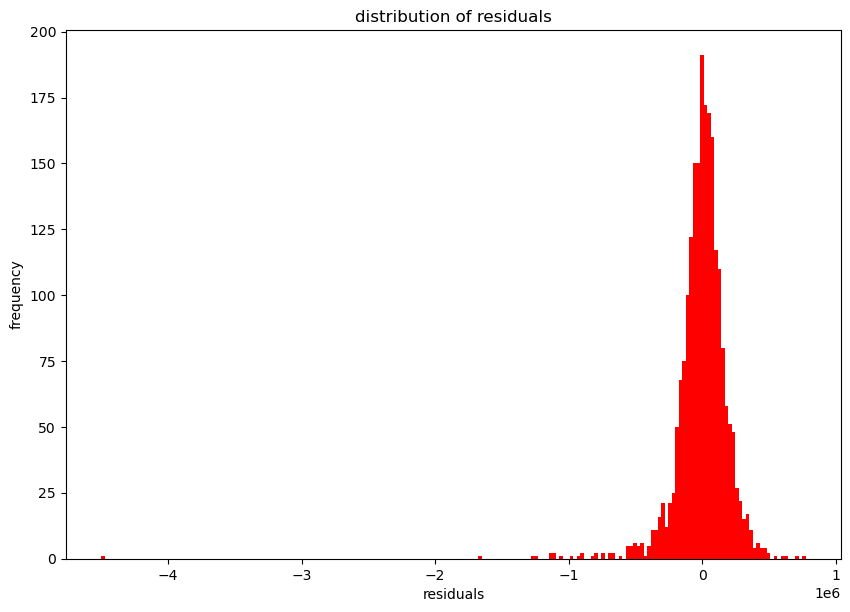

In [25]:
plt.figure(dpi = 100, figsize = (10,7))
plt.hist(residual_table['residuals'], color = 'red', bins = 200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

In [26]:
xgb = xgboost.XGBRegressor(n_estimators=800, learning_rate=0.05,reg_alpha= 0.1, subsample=0.95,colsample_bytree=1, max_depth=6)

In [27]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=800, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, subsample=0.95,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [28]:
predictions = xgb.predict(X_test)
print(explained_variance_score(predictions,y_test))

0.9139721854885249


In [29]:
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,predictions)),'.3f'))
rtrsm = float(format(xgb.score(X_train, y_train),'.3f'))
artrsm = float(format(adjustedR2(xgb.score(X_train,y_train),X_train.shape[0],18),'.3f'))
rtesm = float(format(xgb.score(X_test, y_test),'.3f'))
artesm = float(format(adjustedR2(xgb.score(X_test,y_test),X_test.shape[0],18),'.3f'))
cv = float(format(cross_val_score(xgb,X,y,cv=5).mean(),'.3f'))

In [30]:
r = evaluation.shape[0]
evaluation.loc[r] = ['XGBoost','All features',rmsesm,rtrsm,artrsm,rtesm,artesm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,XGBoost,All features,99892.466,0.980,0.980,0.922,0.921,0.892
0,Multiple Linear Regression(feauture scaling),All features,207908.268,0.677,0.677,0.662,0.659,0.668


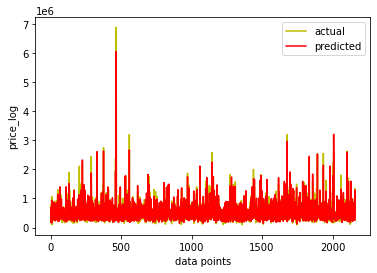

In [31]:
y_test1=np.array(y_test)
y_test1
plt.xlabel('data points')
plt.ylabel('price_log')
plt.plot(y_test1, 'y', label='actual')
plt.plot(predictions, 'r', label='predicted')
plt.legend()
fig = plt.gcf()
plt.show()

Text(0, 0.5, 'predicted price_log')

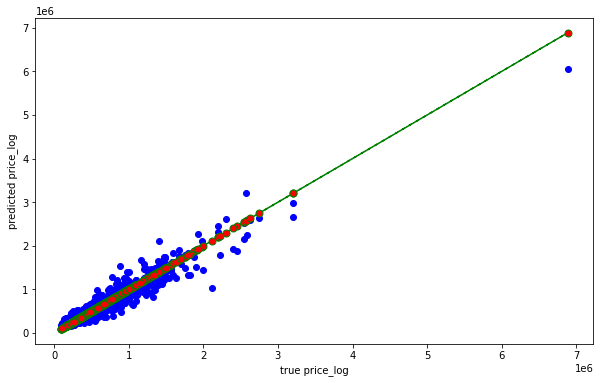

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,predictions,color="blue",marker="o")
plt.plot(y_test,y_test,marker='o',
         color='green',markerfacecolor='red',
         markersize=7,linestyle='dashed')
plt.xlabel('true price_log')
plt.ylabel('predicted price_log')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

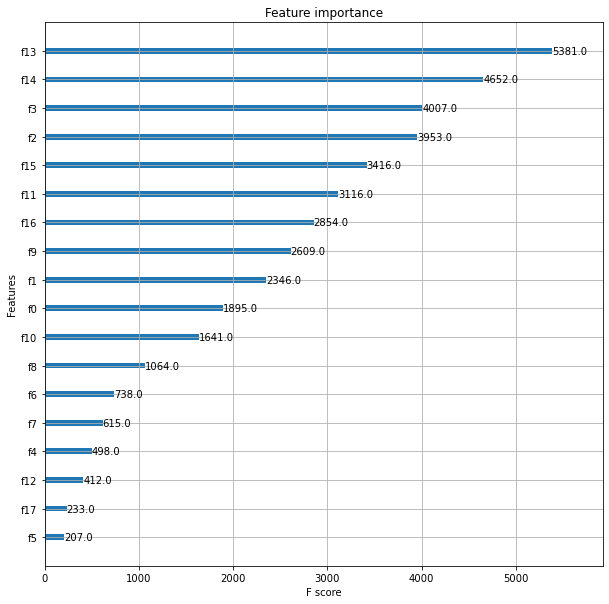

In [33]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
xgboost.plot_importance(xgb,ax=ax,max_num_features=20)

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

In [35]:
est=GradientBoostingRegressor(n_estimators=1000, max_depth=5, loss='ls',min_samples_split=2,learning_rate=0.1).fit(X_train, y_train)

In [36]:
gradient=est.score(X_test,y_test)
pred = est.predict(X_test)
print(gradient)
print(pred)

0.9094156565428149
[ 687200.23581006  384211.25525817  247695.1544908  ... 1326273.30832108
 1039890.02086398  264471.30981487]


In [37]:
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrsm = float(format(est.score(X_train, y_train),'.3f'))
artrsm = float(format(adjustedR2(est.score(X_train,y_train),X_train.shape[0],18),'.3f'))
rtesm = float(format(est.score(X_test, y_test),'.3f'))
artesm = float(format(adjustedR2(est.score(X_test,y_test),X_test.shape[0],18),'.3f'))
cv = float(format(cross_val_score(est,X,y,cv=5).mean(),'.3f'))

In [38]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Gradient Boosting Regressor','All features',rmsesm,rtrsm,artrsm,rtesm,artesm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,XGBoost,All features,99892.466,0.980,0.980,0.922,0.921,0.892
2,Gradient Boosting Regressor,All features,107588.903,0.985,0.985,0.909,0.909,0.887
0,Multiple Linear Regression(feauture scaling),All features,207908.268,0.677,0.677,0.662,0.659,0.668


In [39]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(n_estimators=45, learning_rate=0.2,loss='exponential').fit(X_train, y_train)

In [40]:
adab=ada.score(X_test,y_test)
predict = ada.predict(X_test)
print(adab)
print(predict)

0.6937934914065793
[ 791671.94756009  526814.17506021  345656.27188776 ... 1236614.98918919
 1093911.44451257  345656.27188776]


In [41]:
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,predict)),'.3f'))
rtrsm = float(format(ada.score(X_train, y_train),'.3f'))
artrsm = float(format(adjustedR2(ada.score(X_train,y_train),X_train.shape[0],18),'.3f'))
rtesm = float(format(ada.score(X_test, y_test),'.3f'))
artesm = float(format(adjustedR2(ada.score(X_test,y_test),X_test.shape[0],18),'.3f'))
cv = float(format(cross_val_score(ada,X,y,cv=5).mean(),'.3f'))

In [42]:
r = evaluation.shape[0]
evaluation.loc[r] = ['AdaBoostRegressor','All features',rmsesm,rtrsm,artrsm,rtesm,artesm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,XGBoost,All features,99892.466,0.980,0.980,0.922,0.921,0.892
2,Gradient Boosting Regressor,All features,107588.903,0.985,0.985,0.909,0.909,0.887
3,AdaBoostRegressor,All features,197809.943,0.713,0.713,0.694,0.691,0.674
0,Multiple Linear Regression(feauture scaling),All features,207908.268,0.677,0.677,0.662,0.659,0.668


In [43]:
#using the LightGBM algorithm as the model
import lightgbm as lgb
params={'objective':'regression',
        'metric':'mae'}
reg_lgm = lgb.LGBMRegressor(learning_rate=0.05,**params, n_estimators=1000)
reg_lgm.fit(X_train, y_train)

LGBMRegressor(learning_rate=0.05, metric='mae', n_estimators=1000,
              objective='regression')

In [44]:
reg_lgm.score(X_test,y_test)
reg_lgm.feature_importances_
y_pred_lgm=reg_lgm.predict(X_test)
results = cross_val_score(reg_lgm, X_train, y_train, cv=5, n_jobs=-1)
results.mean()

0.8801745099288432

In [49]:
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,y_pred_lgm)),'.3f'))
rtrsm = float(format(reg_lgm.score(X_train, y_train),'.3f'))
artrsm = float(format(adjustedR2(reg_lgm.score(X_train,y_train),X_train.shape[0],18),'.3f'))
rtesm = float(format(reg_lgm.score(X_test, y_test),'.3f'))
artesm = float(format(adjustedR2(reg_lgm.score(X_test,y_test),X_test.shape[0],18),'.3f'))
cv = float(format(cross_val_score(reg_lgm,X,y,cv=5).mean(),'.3f'))

In [50]:
r = evaluation.shape[0]
evaluation.loc[r] = ['LightGBM','All features',rmsesm,rtrsm,artrsm,rtesm,artesm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,XGBoost,All features,99892.466,0.980,0.980,0.922,0.921,0.892
2,Gradient Boosting Regressor,All features,107588.903,0.985,0.985,0.909,0.909,0.887
4,LightGBM,All features,116410.997,0.974,0.974,0.894,0.893,0.879
3,AdaBoostRegressor,All features,197809.943,0.713,0.713,0.694,0.691,0.674
0,Multiple Linear Regression(feauture scaling),All features,207908.268,0.677,0.677,0.662,0.659,0.668


In [51]:
reg=DecisionTreeRegressor()
reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [52]:
y_pred=reg.predict(X_test)

In [53]:
y_pred
reg.score(X_test,y_test)

0.7394479243161907

In [54]:
for i in range(len(y_test)):
    print("Actual Price:",y_test[i],"Predicted Price:",y_pred[i])

Actual Price: [760000.] Predicted Price: 760000.0
Actual Price: [280000.] Predicted Price: 396400.0
Actual Price: [192000.] Predicted Price: 210000.0
Actual Price: [230500.] Predicted Price: 110000.0
Actual Price: [550000.] Predicted Price: 490000.0
Actual Price: [308625.] Predicted Price: 319950.0
Actual Price: [459000.] Predicted Price: 475000.0
Actual Price: [1070000.] Predicted Price: 1210000.0
Actual Price: [385000.] Predicted Price: 615000.0
Actual Price: [96500.] Predicted Price: 185000.0
Actual Price: [269900.] Predicted Price: 287000.0
Actual Price: [935000.] Predicted Price: 1030000.0
Actual Price: [195000.] Predicted Price: 533250.0
Actual Price: [297000.] Predicted Price: 383000.0
Actual Price: [360000.] Predicted Price: 360000.0
Actual Price: [315000.] Predicted Price: 375000.0
Actual Price: [390000.] Predicted Price: 435000.0
Actual Price: [235245.] Predicted Price: 280000.0
Actual Price: [757500.] Predicted Price: 640000.0
Actual Price: [477500.] Predicted Price: 705000.

Actual Price: [249900.] Predicted Price: 238000.0
Actual Price: [416000.] Predicted Price: 400000.0
Actual Price: [432500.] Predicted Price: 455500.0
Actual Price: [452000.] Predicted Price: 289000.0
Actual Price: [775000.] Predicted Price: 725000.0
Actual Price: [276000.] Predicted Price: 249950.0
Actual Price: [300000.] Predicted Price: 405600.0
Actual Price: [915000.] Predicted Price: 1300000.0
Actual Price: [998000.] Predicted Price: 920000.0
Actual Price: [546000.] Predicted Price: 515000.0
Actual Price: [325000.] Predicted Price: 325000.0
Actual Price: [429300.] Predicted Price: 470000.0
Actual Price: [510000.] Predicted Price: 575000.0
Actual Price: [359000.] Predicted Price: 370000.0
Actual Price: [276000.] Predicted Price: 208000.0
Actual Price: [829000.] Predicted Price: 810000.0
Actual Price: [235000.] Predicted Price: 169900.0
Actual Price: [304500.] Predicted Price: 310950.0
Actual Price: [259950.] Predicted Price: 200000.0
Actual Price: [670000.] Predicted Price: 632000.0

Actual Price: [754000.] Predicted Price: 810000.0
Actual Price: [250000.] Predicted Price: 202500.0
Actual Price: [805000.] Predicted Price: 585000.0
Actual Price: [170000.] Predicted Price: 150950.0
Actual Price: [432500.] Predicted Price: 409950.0
Actual Price: [598000.] Predicted Price: 533300.0
Actual Price: [550000.] Predicted Price: 360000.0
Actual Price: [315000.] Predicted Price: 225000.0
Actual Price: [740000.] Predicted Price: 450000.0
Actual Price: [553500.] Predicted Price: 447000.0
Actual Price: [307635.] Predicted Price: 326989.0
Actual Price: [359900.] Predicted Price: 279000.0
Actual Price: [220000.] Predicted Price: 140000.0
Actual Price: [467000.] Predicted Price: 382000.0
Actual Price: [580000.] Predicted Price: 649990.0
Actual Price: [362000.] Predicted Price: 358500.0
Actual Price: [700000.] Predicted Price: 492500.0
Actual Price: [315000.] Predicted Price: 382000.0
Actual Price: [763000.] Predicted Price: 750000.0
Actual Price: [412000.] Predicted Price: 220000.0


Actual Price: [465000.] Predicted Price: 412250.0
Actual Price: [615000.] Predicted Price: 650000.0
Actual Price: [390000.] Predicted Price: 310000.0
Actual Price: [210000.] Predicted Price: 235000.0
Actual Price: [426000.] Predicted Price: 350000.0
Actual Price: [884900.] Predicted Price: 2200000.0
Actual Price: [990000.] Predicted Price: 1070000.0
Actual Price: [473600.] Predicted Price: 492500.0
Actual Price: [372000.] Predicted Price: 397500.0
Actual Price: [352500.] Predicted Price: 280000.0
Actual Price: [550000.] Predicted Price: 224000.0
Actual Price: [624500.] Predicted Price: 585083.0
Actual Price: [330000.] Predicted Price: 305000.0
Actual Price: [897000.] Predicted Price: 880000.0
Actual Price: [115000.] Predicted Price: 227000.0
Actual Price: [535000.] Predicted Price: 639500.0
Actual Price: [345000.] Predicted Price: 400000.0
Actual Price: [507500.] Predicted Price: 508000.0
Actual Price: [255000.] Predicted Price: 307000.0
Actual Price: [234975.] Predicted Price: 180000.

Actual Price: [745000.] Predicted Price: 645000.0
Actual Price: [259875.] Predicted Price: 355000.0
Actual Price: [359000.] Predicted Price: 270000.0
Actual Price: [367500.] Predicted Price: 300000.0
Actual Price: [327000.] Predicted Price: 390000.0
Actual Price: [320000.] Predicted Price: 382880.0
Actual Price: [430000.] Predicted Price: 412500.0
Actual Price: [461000.] Predicted Price: 440000.0
Actual Price: [1010000.] Predicted Price: 1800000.0
Actual Price: [270000.] Predicted Price: 218000.0
Actual Price: [467100.] Predicted Price: 585000.0
Actual Price: [1400000.] Predicted Price: 1050000.0
Actual Price: [590000.] Predicted Price: 692000.0
Actual Price: [588000.] Predicted Price: 645000.0
Actual Price: [400000.] Predicted Price: 265000.0
Actual Price: [665000.] Predicted Price: 453000.0
Actual Price: [490000.] Predicted Price: 280000.0
Actual Price: [2580000.] Predicted Price: 2680000.0
Actual Price: [344950.] Predicted Price: 419950.0
Actual Price: [450000.] Predicted Price: 425

Actual Price: [654000.] Predicted Price: 529000.0
Actual Price: [300000.] Predicted Price: 162000.0
Actual Price: [280000.] Predicted Price: 280000.0
Actual Price: [445000.] Predicted Price: 459000.0
Actual Price: [425000.] Predicted Price: 477000.0
Actual Price: [352500.] Predicted Price: 380000.0
Actual Price: [197200.] Predicted Price: 241000.0
Actual Price: [744500.] Predicted Price: 583000.0
Actual Price: [350000.] Predicted Price: 292000.0
Actual Price: [265000.] Predicted Price: 253000.0
Actual Price: [595000.] Predicted Price: 831000.0
Actual Price: [290256.] Predicted Price: 300000.0
Actual Price: [196000.] Predicted Price: 120000.0
Actual Price: [355000.] Predicted Price: 443725.0
Actual Price: [200000.] Predicted Price: 269950.0
Actual Price: [245000.] Predicted Price: 345000.0
Actual Price: [330000.] Predicted Price: 380500.0
Actual Price: [804995.] Predicted Price: 829995.0
Actual Price: [212000.] Predicted Price: 216500.0
Actual Price: [589000.] Predicted Price: 640000.0


Actual Price: [575000.] Predicted Price: 585000.0
Actual Price: [529219.] Predicted Price: 472000.0
Actual Price: [825000.] Predicted Price: 740000.0
Actual Price: [720000.] Predicted Price: 690000.0
Actual Price: [664000.] Predicted Price: 397000.0
Actual Price: [422500.] Predicted Price: 379000.0
Actual Price: [549800.] Predicted Price: 549000.0
Actual Price: [570000.] Predicted Price: 500000.0
Actual Price: [495000.] Predicted Price: 400000.0
Actual Price: [252500.] Predicted Price: 255000.0
Actual Price: [640000.] Predicted Price: 1140000.0
Actual Price: [415000.] Predicted Price: 505000.0
Actual Price: [315000.] Predicted Price: 479900.0
Actual Price: [225000.] Predicted Price: 215000.0
Actual Price: [855000.] Predicted Price: 905000.0
Actual Price: [648475.] Predicted Price: 820000.0
Actual Price: [210000.] Predicted Price: 168000.0
Actual Price: [650000.] Predicted Price: 845000.0
Actual Price: [919000.] Predicted Price: 1320000.0
Actual Price: [475000.] Predicted Price: 442500.

Actual Price: [607000.] Predicted Price: 464625.0
Actual Price: [389000.] Predicted Price: 435000.0
Actual Price: [879950.] Predicted Price: 889950.0
Actual Price: [1000000.] Predicted Price: 1010000.0
Actual Price: [317000.] Predicted Price: 295000.0
Actual Price: [640000.] Predicted Price: 1430000.0
Actual Price: [455000.] Predicted Price: 480000.0
Actual Price: [334000.] Predicted Price: 425000.0
Actual Price: [300000.] Predicted Price: 290000.0
Actual Price: [670000.] Predicted Price: 790100.0
Actual Price: [175000.] Predicted Price: 439000.0
Actual Price: [600000.] Predicted Price: 692000.0
Actual Price: [1080000.] Predicted Price: 1240000.0
Actual Price: [1490000.] Predicted Price: 1600000.0
Actual Price: [396000.] Predicted Price: 475000.0
Actual Price: [640000.] Predicted Price: 790000.0
Actual Price: [259950.] Predicted Price: 300000.0
Actual Price: [90000.] Predicted Price: 295000.0
Actual Price: [326000.] Predicted Price: 350000.0
Actual Price: [490000.] Predicted Price: 445

Actual Price: [414050.] Predicted Price: 385000.0
Actual Price: [368500.] Predicted Price: 380000.0
Actual Price: [275000.] Predicted Price: 323000.0
Actual Price: [526750.] Predicted Price: 475000.0
Actual Price: [325000.] Predicted Price: 285000.0
Actual Price: [536650.] Predicted Price: 590000.0
Actual Price: [948000.] Predicted Price: 790000.0
Actual Price: [590000.] Predicted Price: 510000.0
Actual Price: [243500.] Predicted Price: 320000.0
Actual Price: [925000.] Predicted Price: 995000.0
Actual Price: [632500.] Predicted Price: 800000.0
Actual Price: [625000.] Predicted Price: 579950.0
Actual Price: [2630000.] Predicted Price: 2100000.0
Actual Price: [755000.] Predicted Price: 700000.0
Actual Price: [218500.] Predicted Price: 200000.0
Actual Price: [587000.] Predicted Price: 525000.0
Actual Price: [770000.] Predicted Price: 575000.0
Actual Price: [622000.] Predicted Price: 570000.0
Actual Price: [914600.] Predicted Price: 1080000.0
Actual Price: [205000.] Predicted Price: 390000

In [55]:
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),'.3f'))
rtrsm = float(format(reg.score(X_train, y_train),'.3f'))
artrsm = float(format(adjustedR2(reg.score(X_train,y_train),X_train.shape[0],len(X[0,:])),'.3f'))
rtesm = float(format(reg.score(X_test, y_test),'.3f'))
artesm = float(format(adjustedR2(reg.score(X_test,y_test),X_test.shape[0],len(X[0,:])),'.3f'))
cv = float(format(cross_val_score(reg,X,y,cv=5).mean(),'.3f'))

In [56]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Decision Tree regression','All Features',rmsesm,rtrsm,artrsm,rtesm,artesm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,XGBoost,All features,99892.466,0.980,0.980,0.922,0.921,0.892
2,Gradient Boosting Regressor,All features,107588.903,0.985,0.985,0.909,0.909,0.887
4,LightGBM,All features,116410.997,0.974,0.974,0.894,0.893,0.879
5,Decision Tree regression,All Features,182468.616,0.999,0.999,0.739,0.737,0.745
3,AdaBoostRegressor,All features,197809.943,0.713,0.713,0.694,0.691,0.674
0,Multiple Linear Regression(feauture scaling),All features,207908.268,0.677,0.677,0.662,0.659,0.668


In [57]:
reg=RandomForestRegressor(n_estimators=400)
reg.fit(X_train,y_train)

RandomForestRegressor(n_estimators=400)

In [61]:
y_pred=reg.predict(X_test)
reg.score(X_test,y_test)

0.8965119430720777

In [62]:
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),'.3f'))
rtrsm = float(format(reg.score(X_train, y_train),'.3f'))
artrsm = float(format(adjustedR2(reg.score(X_train,y_train),X_train.shape[0],len(X[0,:])),'.3f'))
rtesm = float(format(reg.score(X_test, y_test),'.3f'))
artesm = float(format(adjustedR2(reg.score(X_test,y_test),X_test.shape[0],len(X[0,:])),'.3f'))
cv = float(format(cross_val_score(reg,X,y,cv=5).mean(),'.3f'))

In [164]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Random Forest Regression','All Features',rmsesm,rtrsm,artrsm,rtesm,artesm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,XGBoost,All features,123895.973,0.980,0.980,0.886,0.885,0.892
2,Gradient Boosting Regressor,All features,127232.171,0.985,0.985,0.880,0.879,0.887
4,LightGBM,All features,124950.054,0.976,0.976,0.884,0.883,0.879
6,Random Forest Regression,All Features,129913.940,0.982,0.982,0.875,0.874,0.874
5,Decision Tree regression,All Features,203195.640,0.999,0.999,0.694,0.691,0.738
3,AdaBoostRegressor,All features,216493.303,0.705,0.705,0.652,0.649,0.673
0,Multiple Linear Regression(feauture scaling),All features,213145.468,0.677,0.676,0.663,0.660,0.668


In [165]:
from sklearn.neighbors import KNeighborsRegressor
classifier=KNeighborsRegressor(n_neighbors=7)
classifier.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [166]:
y_pred=classifier.predict(X_test)
y_pred
classifier.score(X_test,y_test)

0.772447123290429

In [167]:
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),'.3f'))
rtrsm = float(format(classifier.score(X_train, y_train),'.3f'))
artrsm = float(format(adjustedR2(classifier.score(X_train,y_train),X_train.shape[0],len(X[0,:])),'.3f'))
rtesm = float(format(classifier.score(X_test, y_test),'.3f'))
artesm = float(format(adjustedR2(classifier.score(X_test,y_test),X_test.shape[0],len(X[0,:])),'.3f'))
cv = float(format(cross_val_score(classifier,X,y,cv=5).mean(),'.3f'))

In [168]:
r = evaluation.shape[0]
evaluation.loc[r] = ['KNN(neighbhors=5)','All Features',rmsesm,rtrsm,artrsm,rtesm,artesm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,XGBoost,All features,123895.973,0.980,0.980,0.886,0.885,0.892
2,Gradient Boosting Regressor,All features,127232.171,0.985,0.985,0.880,0.879,0.887
4,LightGBM,All features,124950.054,0.976,0.976,0.884,0.883,0.879
6,Random Forest Regression,All Features,129913.940,0.982,0.982,0.875,0.874,0.874
5,Decision Tree regression,All Features,203195.640,0.999,0.999,0.694,0.691,0.738
3,AdaBoostRegressor,All features,216493.303,0.705,0.705,0.652,0.649,0.673
0,Multiple Linear Regression(feauture scaling),All features,213145.468,0.677,0.676,0.663,0.660,0.668
7,KNN(neighbhors=5),All Features,175088.725,0.848,0.848,0.772,0.771,0.502


In [169]:
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=True)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
7,KNN(neighbhors=5),All Features,175088.725,0.848,0.848,0.772,0.771,0.502
0,Multiple Linear Regression(feauture scaling),All features,213145.468,0.677,0.676,0.663,0.660,0.668
3,AdaBoostRegressor,All features,216493.303,0.705,0.705,0.652,0.649,0.673
5,Decision Tree regression,All Features,203195.640,0.999,0.999,0.694,0.691,0.738
6,Random Forest Regression,All Features,129913.940,0.982,0.982,0.875,0.874,0.874
4,LightGBM,All features,124950.054,0.976,0.976,0.884,0.883,0.879
2,Gradient Boosting Regressor,All features,127232.171,0.985,0.985,0.880,0.879,0.887
1,XGBoost,All features,123895.973,0.980,0.980,0.886,0.885,0.892


In [170]:
from __future__ import print_function
import pandas as pd
from pandas import Series,DataFrame
#from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import mean_squared_error

In [171]:
model = Sequential()

model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=500)

Epoch 1/500
152/152 [==============================] - 4s 4ms/step - loss: 422899482624.0000 - val_loss: 404527218688.0000
Epoch 2/500
152/152 [==============================] - 0s 2ms/step - loss: 225005076480.0000 - val_loss: 81287430144.0000
Epoch 3/500
152/152 [==============================] - 0s 2ms/step - loss: 67077365760.0000 - val_loss: 63679971328.0000
Epoch 4/500
152/152 [==============================] - 0s 1ms/step - loss: 56801415168.0000 - val_loss: 55669248000.0000
Epoch 5/500
152/152 [==============================] - 0s 2ms/step - loss: 50477395968.0000 - val_loss: 49591169024.0000
Epoch 6/500
152/152 [==============================] - 0s 1ms/step - loss: 45683806208.0000 - val_loss: 44983558144.0000
Epoch 7/500
152/152 [==============================] - 0s 2ms/step - loss: 42329624576.0000 - val_loss: 41996685312.0000
Epoch 8/500
152/152 [==============================] - 0s 1ms/step - loss: 40260300800.0000 - val_loss: 40355491840.0000
Epoch 9/500
152/152 [========

Epoch 135/500
152/152 [==============================] - 0s 1ms/step - loss: 27262517248.0000 - val_loss: 31934470144.0000
Epoch 136/500
152/152 [==============================] - 0s 1ms/step - loss: 27267069952.0000 - val_loss: 31932045312.0000
Epoch 137/500
152/152 [==============================] - 0s 2ms/step - loss: 27283642368.0000 - val_loss: 31623620608.0000
Epoch 138/500
152/152 [==============================] - 0s 1ms/step - loss: 27183243264.0000 - val_loss: 31992092672.0000
Epoch 139/500
152/152 [==============================] - 0s 1ms/step - loss: 27178594304.0000 - val_loss: 31591829504.0000
Epoch 140/500
152/152 [==============================] - 0s 1ms/step - loss: 27165773824.0000 - val_loss: 31732006912.0000
Epoch 141/500
152/152 [==============================] - 0s 1ms/step - loss: 27121915904.0000 - val_loss: 31495602176.0000
Epoch 142/500
152/152 [==============================] - 0s 1ms/step - loss: 27115534336.0000 - val_loss: 31487418368.0000
Epoch 143/500
15

152/152 [==============================] - 0s 2ms/step - loss: 16285048832.0000 - val_loss: 22604904448.0000
Epoch 268/500
152/152 [==============================] - 0s 2ms/step - loss: 16216464384.0000 - val_loss: 22320287744.0000
Epoch 269/500
152/152 [==============================] - 0s 2ms/step - loss: 16085417984.0000 - val_loss: 22186377216.0000
Epoch 270/500
152/152 [==============================] - 0s 1ms/step - loss: 16004957184.0000 - val_loss: 21958430720.0000
Epoch 271/500
152/152 [==============================] - 0s 1ms/step - loss: 15933795328.0000 - val_loss: 22071848960.0000
Epoch 272/500
152/152 [==============================] - 0s 2ms/step - loss: 15784406016.0000 - val_loss: 21947332608.0000
Epoch 273/500
152/152 [==============================] - 0s 2ms/step - loss: 15743540224.0000 - val_loss: 21747245056.0000
Epoch 274/500
152/152 [==============================] - 0s 2ms/step - loss: 15690066944.0000 - val_loss: 21953214464.0000
Epoch 275/500
152/152 [=======

152/152 [==============================] - 0s 2ms/step - loss: 11228625920.0000 - val_loss: 16470521856.0000
Epoch 400/500
152/152 [==============================] - 0s 2ms/step - loss: 11203509248.0000 - val_loss: 16582424576.0000
Epoch 401/500
152/152 [==============================] - 0s 2ms/step - loss: 11312160768.0000 - val_loss: 16474808320.0000
Epoch 402/500
152/152 [==============================] - 0s 2ms/step - loss: 11167062016.0000 - val_loss: 16087435264.0000
Epoch 403/500
152/152 [==============================] - 0s 2ms/step - loss: 11148006400.0000 - val_loss: 16215426048.0000
Epoch 404/500
152/152 [==============================] - 0s 2ms/step - loss: 11119200256.0000 - val_loss: 16234377216.0000
Epoch 405/500
152/152 [==============================] - 0s 2ms/step - loss: 11132985344.0000 - val_loss: 16285747200.0000
Epoch 406/500
152/152 [==============================] - ETA: 0s - loss: 11130832896.000 - 0s 2ms/step - loss: 11135962112.0000 - val_loss: 16018150400.0

<AxesSubplot:>

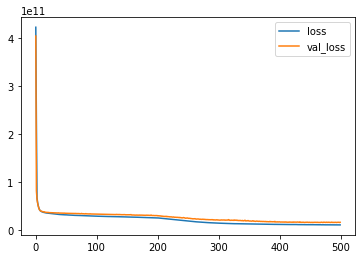

In [172]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [173]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 50)                950       
                                                                 
 dense_81 (Dense)            (None, 50)                2550      
                                                                 
 dense_82 (Dense)            (None, 50)                2550      
                                                                 
 dense_83 (Dense)            (None, 50)                2550      
                                                                 
 dense_84 (Dense)            (None, 1)                 51        
                                                                 
Total params: 8,651
Trainable params: 8,651
Non-trainable params: 0
_________________________________________________________________


In [174]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score

In [175]:
predictions = model.predict(X_test)

In [176]:
error=pd.DataFrame([[mean_squared_error(y_test,predictions),
                     np.sqrt(mean_squared_error(y_test,predictions)),
                    mean_absolute_error(y_test,predictions),
                    explained_variance_score(y_test,predictions),r2_score(y_test,predictions)]],
                   columns=["Mean Squared Error (MSE)","Root Mean Squared Error (RMSE)",
                                 "Mean Absolute Error (MAE)","Explained Variance Score","R squared"])
error

,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE),Explained Variance Score,R squared
0,1.562187e+10,124987.471915,71884.578114,0.884304,0.884042
